<font color = 'purple'> <h1> <center> Processo Seletivo Poli Júnior - 2023.2  </center> </h1> </font>
    <h2> <center> Núcleo de Análise e Inteligência de Dados </center> </h2>
    

Olá, boas vindas ao Processo Seletivo 2023.2 da Poli Júnior! Essa é a versão do PS para quem deseja executar um entregável relacionado a Análise e Inteligência de Dados.
Este entregável será exclusivamente feito em Python, usando algumas bibliotecas voltadas para a análise de dados em si. Seguem algumas regras gerais para o entregável:<ul>
<li>A entrega consiste em enviar esse mesmo arquivo em .ipynb até às 23:59 horas do dia 31/08. <br></li>
<li>Disponibilizamos vídeos para introdução aos conteúdos cobrados, no link: https://drive.google.com/drive/folders/1BOvPgISUJM43Tj_Tsim5R9s_3KxkBz0t?usp=sharing.</li><li> Além disso, há um grupo para tirar dúvidas, no link: https://chat.whatsapp.com/G2VGydPLYyy6O8kpTouN2V<br></li>
<li>Avaliaremos todo o conteúdo feito, não sendo necessesário o preenchimento de todos os itens para prosseguir a etapa de avaliação<br></li>
<li><b>NÃO SE IDENTIFIQUE NO ARQUIVO, APENAS COM O NÚMERO USP NO NOME DO ARQUIVO</b> <br></li>
    <li>Adicione quantas células forem necessárias<br></li>

<li>O resultado será corrigido de acordo com as informações da base, não se preocupe em ir atrás de dados on-line<br></li></ul>
<b>Obrigado pela atenção e bom entregável.</b>


# Parte 1: Perguntas diretas

A primeira parte do entregável consiste em perguntas diretas que devem ser respondidas no espaço destinado. A base foi fornecida por uma grande rede de imóveis, cliente da Poli Júnior.


A base consiste das seguintes colunas:

* id: ID do imóvel

* NAME: nome do imóvel

* host id: ID do anfitrião

* host_identity_verified: verificação da identidade do anfitrião

* host name: nome do anfitrião

* neighbourhood group: distritos

* neighbourhood: bairros

* lat: latitude

* long: longitude

* country: país

* country code: sigla do país

* Instant_bookable: pode ser reservado instantaneamente

* cancellation_policy: política de cancelamento

* room type: tipo de habitação

* Construction year: ano de construção

* price: preço

* service fee: taxa de serviço

* minimum nights: mínimo de noites

* number of reviews: número de avaliações

* last review: última avaliação

* reviews per month: avaliações por mês

* review rate number: taxa média de avaliação

* availabiity 365: disponibilidade de dias em um ano (365 dias)

* house_rules: regras da casa

* license: autorização









#### Importação das bibliotecas utilizadas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #importei por conta própria para usar futuramente e complementar matplotlib
import re # importando essa biblioteca pra usar regex

#### Leitura da base de dados

In [30]:
#Leitura da base (coloque o arquivo na mesma pasta na qual o código está salvo)
df = pd.read_csv('airbnb.csv', low_memory=False)
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,386.0,NaN,NaN


# Questão 1 - Limpeza da base  
###  É sempre importante verificar a integridade da base e de suas colunas.

a) Conte a quantidade de valores nulos na coluna de preço (price).






In [31]:
df['price'].isnull().sum()

247

b) Apague as linhas que contenham preços nulos e refaça a numeração dos ids dos imóveis.


In [32]:
df.dropna(subset=["price"],inplace=True)   #ou df[df['price'].notnull()]
df.reset_index(drop=True,inplace=True)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,289.0,"Please no smoking in the house, porch or on th...",NaN


#### Para as questões seguintes, utilize a base obitda como resultado da questão 1
# Questão 2
a) Crie uma coluna que corresponda a soma do preço e da taxa de serviço (price + service fee)




In [33]:
def currency(value):
    try:
        return float(value.replace('$', '').replace(',', ''))
    except AttributeError:
        if isinstance(value, float):
            return value


df["service fee"] = df["service fee"].fillna(0) # completa células nan com 0

df['price'] = df['price'].apply(currency) # aplica função na coluna e retorna valor em float
df['service fee'] = df['service fee'].apply(currency) # aplica função na coluna e retorna valor em float
df['price + service fee'] = df['price'] + df['service fee'] # cria uma nova coluna a partir da soma das outras duas

df[['price', 'service fee', 'price + service fee']] # filtro pra visualizar dados e ver se faz sentido

,price,service fee,price + service fee
0,966.0,193.0,1159.0
1,142.0,28.0,170.0
2,620.0,124.0,744.0
3,368.0,74.0,442.0
4,204.0,41.0,245.0
...,...,...,...
102347,844.0,169.0,1013.0
102348,837.0,167.0,1004.0
102349,988.0,198.0,1186.0
102350,546.0,109.0,655.0


 b) Obtenha o nome do imóvel que possui o maior número de avaliações (number of reviews) e que apresente taxa média de avaliação igual a 5 (review rate number).




In [34]:
a = df[(df["review rate number"].eq(5))] # aplica um filtro pra pegar imóveis avaliados com nota 5
v_max = a['number of reviews'].max() # olha coluna de número de reviews e pega o valor máximo (dentro dos imóveis selecionados antes)
print(df.loc[df["number of reviews"]==v_max]['NAME'].to_list()[0]) # printa nome do imóvel que apresenta caracs pedidas

THE PRIVACY DEN ~ 5 MINUTES TO JFK


 c) Obtenha o nome do bairro (neighbourhood) que mais aparece e sua média de preço. <br>

OBS: para o cálculo da média de preço, utilize a coluna que foi criada na questão 2a.

In [35]:
df1 = df['neighbourhood'].value_counts() # Series com frequência de aparição de cada bairro em ordem decrescente
df1

Bedford-Stuyvesant        7921
Williamsburg              7756
Harlem                    5456
Bushwick                  4966
Hell's Kitchen            3961
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

In [36]:
name = df1.index.to_list()[0] # Seleciona o primeiro termo da lista de bairros ordenada em ordem decrescente de frequência
mean = df[df['neighbourhood'].eq(name)]['price + service fee'].mean() # Faz a média dos preços dos imóveis do bairro modal
print(f'nome do bairro que mais aparece: {name} | média de preço: {mean}')

nome do bairro que mais aparece: Bedford-Stuyvesant | média de preço: 747.2280035447525


# Questão 3
a) Crie uma nova coluna de faixa de preço a partir da coluna de preço criada no item 2a que obedeça os seguintes critérios: <br>
preço <= 120 seja $;   120 < preço <= 250 seja $$;    250 < preço <= 500 seja $$$;   500 < preço <=1000 seja $$$$;    preço > 1000 seja $$$$$



In [37]:
def rate_price(row):
    price = row['price + service fee']
    if price <= 120:
        return "$"
    elif price <= 250:
        return "$$"
    elif price <= 500:
        return '$$$'
    elif price <= 1000:
        return '$$$$'
    else:
        return '$$$$$'

df['price $'] = df.apply(rate_price, axis='columns') # Cria nova coluna a partir da interpretação dos valores de outra
df[['price', 'service fee', 'price + service fee', 'price $']].head() # pra conferir resultados

# ESTA COM UM PROBLEMA DE DIAGRAMAÇÃO NA TABELA, POIS ESTA CORTANDO ALGUNS CIFROES (mas no Excel está certinho)

,price,service fee,price + service fee,price $
0,966.0,193.0,1159.0,$$$$$
1,142.0,28.0,170.0,$$
2,620.0,124.0,744.0,$$$$
3,368.0,74.0,442.0,$$$
4,204.0,41.0,245.0,$$


 b) Crie um gráfico de latitude (lat) e longitude (long) dividido por distritos (neighbourhood group), o qual retornará o mapa de Nova York.

In [38]:
df1 = df[['neighbourhood group', 'lat', 'long']] # filtrando região de análise

df1['neighbourhood group'].unique() # verificando os nomes existentes na coluna

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

pode-se observar que há nomes diferentes para uma mesma vizinhança

In [39]:
# Arrumando o grupo de vizinhança já sabendo quais valores quero trocar
def change_name(name):
    if pd.isna(name):
        return name
    if name[0].isupper(): #fazendo a checagem por letra maiúscula pois sei que se entrar representa uma vizinhaça
        return name
    elif name == 'manhatan': #poderia substituir usando match/case e/ou regex (em problemas mais gerais)
        return 'Manhattan'
    else:
        return 'Brooklyn'


df['neighbourhood group'] = df.loc[:,'neighbourhood group'].apply(change_name) # aplica a mudança de nomes para manter padrão corretor
df['neighbourhood group'].unique() # verificando

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

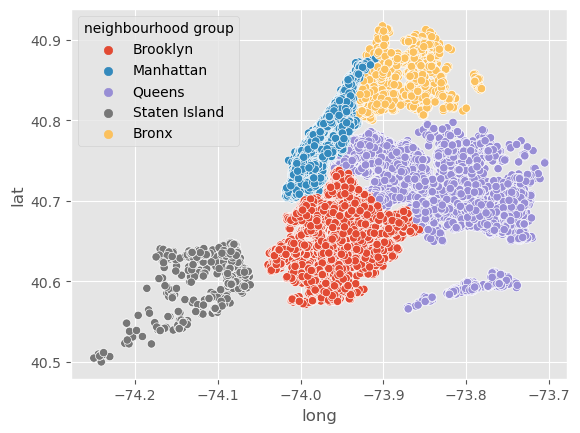

In [40]:
sns.scatterplot(data=df, x='long', y='lat',  hue='neighbourhood group')
plt.show()

# Questão 4
Conte quantas vezes aparece a palavra "smoking" na coluna de regras da casa (house_rules).

In [41]:
counter = 0
for sentence in df.loc[:,'house_rules']:
    if pd.isna(sentence):
        pass
    else:
        counter += len(re.findall(r'[Ss]moking', sentence))

print(f'Quantidade de aparições da palavra "smoking" na coluna de regras da casa: {counter}')

Quantidade de aparições da palavra "smoking" na coluna de regras da casa: 31393


# Parte 2: Análise exploratória e preditiva

Chegamos na segunda parte do entregável!
Aqui será feita uma análise mais ampla do que o exercício anterior, por isso não existe um script com o que deve ser entregue nem uma única resposta correta. Todo raciocínio desenvolvido será considerado.

Usaremos uma base de dados diferente, em que estão representados características dos clientes de uma rede de supermercado.

O objetivo aqui é extrair insights para o supermercado, que pretende otimizar suas campanhas de marketing, reduzindo custos com clientes que provavelmente não se interessam por elas.

Tendo isso em vista, desenvolva uma análise exploratória dessa base de dados, buscando entender quais informações são importantes para o direcionamento adequado das campanhas de marketing e quais são os perfis de clientes do supermercado. Busque entender a relação entre as colunas e para isso você pode utilizar algumas bibliotecas para te auxiliar, como: MatPlotLib e Pandas.

Além disso, você pode pesquisar outras bibliotecas disponíveis, como a Scikit-learn, para complementar a sua análise com métodos de Machine Learning como K-Means e DBSCAN. Lembrando que a utilização desses métodos não é obrigatória. Além disso, busque organizar a sua entrega escrevendo todos os seus insights e conclusões em Markdowns.


## Explicação das colunas da base

* Year_Birth: Ano de nascimento
* Education: Grau de escolaridade
* Marital_Status: Estado Civil
* Income: Renda anual da residência
* Kidhome: Número de criaças pequenas na residência
* Teenhome: Número de adolescentes na residência
* Dt_Customer: Data em que o cliente foi cadastrado no supermercado
* Recency: Número de dias desde a última compra
* MntWines: Valor gasto em vinhos nos últimos 2 anos
* MntFruits: Valor gasto em frutas nos últimos 2 anos
* MntMeatProducts: Valor gasto em carne vermelha nos últimos 2 anos
* MntFishProducts: Valor gasto em pescados nos últimos 2 anos
* MntSweetProducts: Valor gasto em doces nos últimos 2 anos
* MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos
* NumDealsPurchases: Número de compras feitas com desconto
* NumWebPurchases: Número de compras feitas através do site do supermercado
* NumCatalogPurchases: Número de compras feitas através do Catálogo
* NumStorePurchases: Número de compras feitas diretamente em lojas físicas
* NumWebVisitsMonth: Número de visitas ao site do supermercado no último mês
* AcceptedCmp1: 1 se o cliente aceitou a oferta na primeira campanha de marketing, 0, caso contrário
* AcceptedCmp2: 1 se o cliente aceitou a oferta na segunda campanha de marketing, 0, caso contrário
* AcceptedCmp3: 1 se o cliente aceitou a oferta na terceira campanha de marketing, 0, caso contrário
* AcceptedCmp4: 1 se o cliente aceitou a oferta na quarta campanha de marketing, 0, caso contrário
* AcceptedCmp5: 1 se o cliente aceitou a oferta na quinta campanha de marketing, 0, caso contrário
* Complain: 1 se o cliente reclamou nos últimos 2 anos, 0, caso contrário
* Response: 1 se o cliente aceitou a oferta na última campanha, 0, caso contrário


Segue links que possam ser úteis nessa parte do entregável:

* https://blog.betrybe.com/tecnologia/clusterizacao/

* https://www.devmedia.com.br/data-mining-na-pratica-algoritmo-k-means/4584

* https://gabriellm.medium.com/entendendo-dbscan-770f680d9160







### Abrindo e lendo arquivo

In [42]:
# Importando mais bibliotecas para essa parte 2
import sklearn as sk

plt.style.use('ggplot') # estilo dos gráficos
pd.options.display.max_columns=30 # para visualizar todas as colunas do df

In [43]:
df = pd.read_csv('campanha_marketing.csv',sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Entendendo os Dados

In [44]:
df.shape

(2240, 27)

In [45]:
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [47]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Breves observações de algumas variáveis:**

#### Year_Birth

Média e Terceiro Quartil sugerem clientes adultos/idosos

Valor mínimo bem estranho

#### Income

Min e Max bem destoantes

#### Recency

Clientes possuem 'ciclos de compra' de aprox. 49 dias

Std grande

#### NumWebPurchases, NumDealsPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

Lojas físicas com média de número de compras maior, seguido por compras online

Cabe uma análise futura de possíveis relações entre VisitasWeb e Ofertas com as formas de compra

#### Campanhas 

Pelas médias, Campanha 6 (Response) possui maior aceitação, seguida pela Campanha 4

Pelo critério anterior, Campanha 2 possui aceitação bem abaixo das demais. (válido analisar futuramente possíveis razões) 


### Preparando dados

In [48]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [49]:
# agora que tenho a data formatada, posso descobrir qual foi a data do registro mais recente pra ter noção temporal dos dados
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

Registro mais recente é de 2014

1) A base de dados é de 2014/2015 e quero fazer uma análise para uma campanha atual(2023)?

2) A base de dados é atual e realmente o último registro foi de 2014?

se 1: modelagem e conclusão pode ser afetada siginificativamente, pois pode ter acontecido muita coisa nesse período sem dados

se 2: modelagem e conclusão mais precisas

pelo contexto, é mais provável que a situação 1 esteja correta (mas não necessariamente 2023 seja o atual)


In [50]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [51]:
# analisando pessoas com Income NaN

df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


Somente 'Income' com NaN, resto tudo ok.

Por isso vou manter esses dados

In [52]:
df.loc[df.duplicated(subset=['ID'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


Sem ids duplicados

In [53]:
# Renomeando a coluna "response" para "AcceptedCmp6", a fim de manter o padrão

df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

### Alguns gráficos

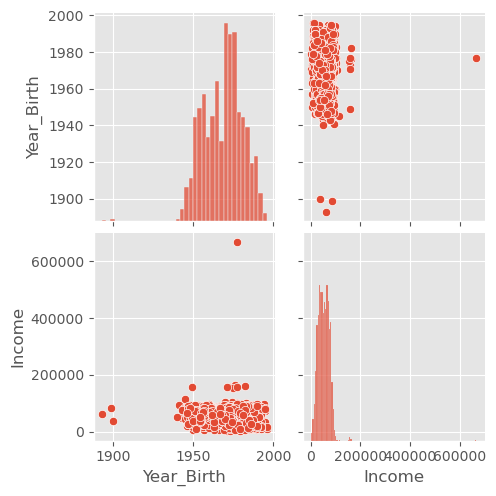

In [54]:
sns.pairplot(data=df, vars=['Year_Birth', 'Income'] )
plt.show()

daqui dá pra ver que tem uma pessoa com um income absurdo e fora do comum e que há 3 pessoas com nascimento duvidoso

vou retirar essas pessoas para analisar melhor o todo

In [55]:
df[df['Income'].gt(300000)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


não respondeu a nenhuma campanha

restante dos dados, especialmente valor gasto, não são condizentes com Income absurdo.

**válido retirar**

In [56]:
df[df['Year_Birth'].lt(1910)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


considerando que esses dados correspondam a um periodo anterior a 2015/2016, essas pessoas devem ter registrado o nascimento errado

**válido retirar**

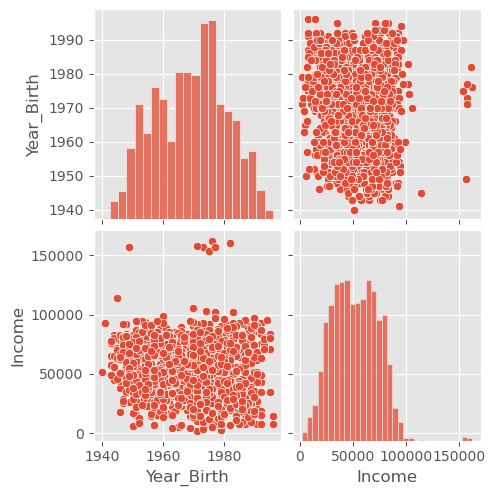

In [57]:
# retirando os outliers
df = df[(df['Income'].lt(300000)) & (df['Year_Birth'].gt(1910))]

sns.pairplot(data=df, vars=['Year_Birth', 'Income'])
plt.show()

agora os dados parecem mais normais

não parece haver correlação significativa entre ano de nascimento e renda

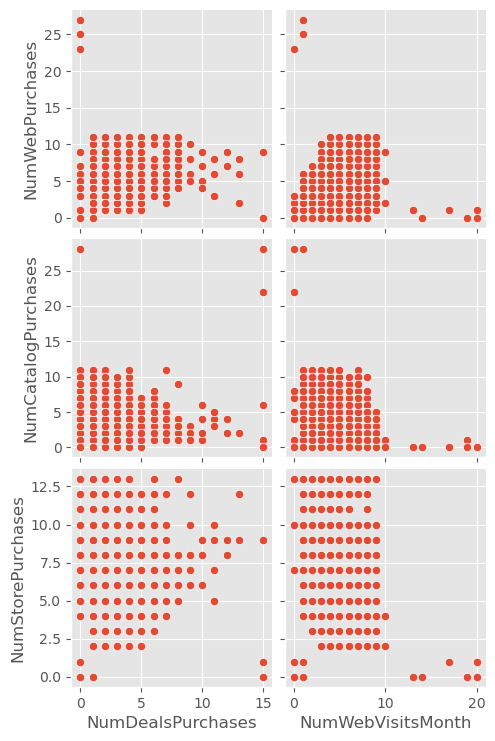

In [65]:
rel_compras = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

sns.pairplot(data=df, x_vars=df[['NumDealsPurchases', 'NumWebVisitsMonth']] , y_vars= df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']])
plt.show()

visitasWeb e quantidade de Ofertas não parecem impactar muito no local de compra em si

### Modelagem

In [58]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# transformando coluna 'Education' e 'Marital_Status' para facilitar modelagem

encoder = OrdinalEncoder().set_output(transform="pandas")
df['Education_Encoded'] = encoder.fit_transform(df[['Education']])

encoder2 = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
marital_encoded = encoder2.fit_transform(df[['Marital_Status']])
df_mod = df.merge(marital_encoded, left_index=True, right_index=True, how='outer')

df_mod.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Education_Encoded',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

C:\Users\OCEAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\OCEAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\OCEAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\OCEAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

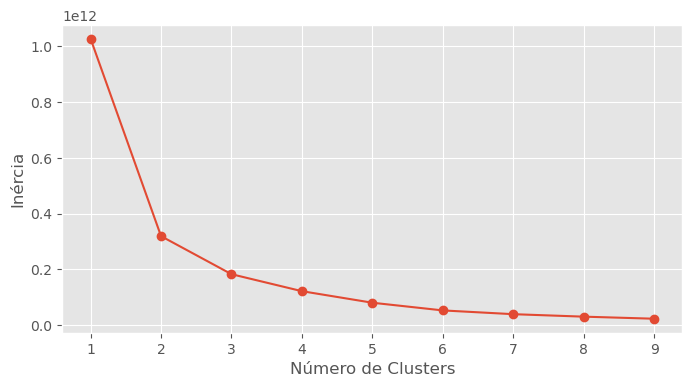

In [59]:
from sklearn.cluster import KMeans

valores_inercia = []
dados = ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Education_Encoded',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO']

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_mod[dados])
    valores_inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1,10), valores_inercia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(np.arange(1,10))
plt.show()

parece razoável utilizar 3 como a quantidade de cluster ideal

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Education_Encoded,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,...,0,0,0,0,0,1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,...,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,...,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,...,0,0,0,0,0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,...,0,0,0,0,0,0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Conclusão

Gráfico scatter de deals e XXPurchases (p/ achar possíveis relações)